<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Nearest-Neighbors-no-supervisado" data-toc-modified-id="Nearest-Neighbors-no-supervisado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nearest Neighbors no supervisado</a></span></li><li><span><a href="#Nearest-Neighbors-Regression" data-toc-modified-id="Nearest-Neighbors-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nearest Neighbors Regression</a></span></li></ul></div>

# Introducción 

La idea principal del procedimiento KNN ( K-Nearest-Neighbors) se basa en elegir k puntos más cercanos (el cercano en sentido de una métrica con la que se trabaja)al que se quiere clasificar. Después se elige  la clase más frecuente de entre lo k vecinos más próximos. La cuestión teórica se puede ver en los siguientes enlaces:

* http://wwwae.ciemat.es/~cardenas/docs/curso_MD/knn.pdf
* http://www.oldemarrodriguez.com/yahoo_site_admin/assets/docs/Presentaci%C3%B3n_-_KNN.20085205.pdf
* http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/t9knn.pdf

En scikit learn se define de la siguiente manera:

"_Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point_".

Scikit-learn implementa dos tipo diferentes de clasificadores basados en los vecinos más próximos:

1.- El método <span style="color:red"> _KNeighborsClassifier_ </span>basado en el voto mayoritario de los k vecinos más próximos.

2.- El método <span style="color:red"> _RadiusNeighborsClassifier_ </span> basado en el voto de los k vecinos que se encuentran dentro de un círculo de de redio r, donde r es un valor de punto flotante especificado por el usuario.

Por defecto, los métodos que se utilizan para este tipo de clasificación, emplean peso igual para todos los puntos, de esta manera el valor que se le asigna al punto que se va a clasificar se obtiene mediante voto mayoritario de los vecinos más próximos. **En ocasiones es más fiable asignar peso diferente** a cada uno de los vecinos que intervienen en la clasificación, y así por ejemplo se podría dar un peso mayor a los vecinos más próximos al elemento que se quiere clasificar, y que por lo tanto contribuiría más en el ajuste del modelo. El sistema de asignación de pesos se obtiene utilizando el parámetro "weights", siendo el valor que tiene por defecto "wights='uniform'", sin embargo otra posibilidad es "wights='distance'", dando pesos inversamente proporcional a la distancia que hay al punto que se quiere clasificar. Alternativamente, también se puede definir una función "hac hop" para definir esos pesos. 

Estos métodos así como otros que se basan en  métodos diferentes, tienen una fuerte dependencia de la métrica utilizada. Scikit-learn puede trabajar con muchas métricas, todas ellas [se pueden encontrar en este enlace](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html){:target="_blank"}.

A continuación se muestra un ejemplo sobre su utilización:


Automatically created module for IPython interactive environment
Primeros elementos de X  [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]]
Primeros elementos de y  [0 0 0 0 0 0 0]
Valores únicos de y  [0 1 2]


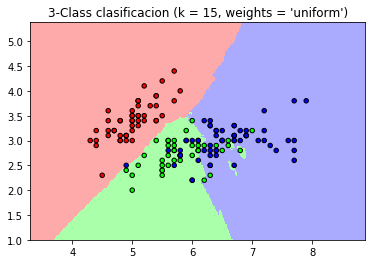

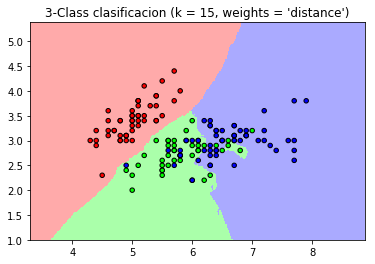

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15  # Este sería el valor de K=15; se cuentan los 15 vecinos más próximo

# importamos el conjunto datos Iris
iris = datasets.load_iris()

X = iris.data[:, :2] #Nos quedamos sólo con las dos primeras columnas o features
y = iris.target  #Serían las clasificaciones que se hacen

print("Primeros elementos de X ",X[0:7,:])
print("Primeros elementos de y ",y[0:7])
print("Valores únicos de y ",np.unique(y))

h = .02  # paso dado a la regilla

# Creando un  color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#Lo anterior, para definir los colores de las regiones
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
#Lo anterior para definir los colores de los puntos

for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador y ajustamos los datos.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    #lo anterior para definir el modelo de clasificación
    clf.fit(X, y) #Se ajusta el modelo

    # Creamos los puntos de la rejilla para luego crear
    # las zons de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Lo anterior para calcular la predicción de cada elemento de la red

    # Ponemos los resultados en un plot de color
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # con cmap=cmap_light se elige el color de la región

    # Dibujamos también los puntos trining
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class clasificacion (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Nearest Neighbors no supervisado 

También se pueden utilizar métodos no supervisados, mediante el método "_NearestNeighbors_". La búsqueda de los vecinos más próximos, se puede hacer mediante el parámetro 'algorithm' que puede utilizar uno de los siguientes valores:

- 'auto'
- 'ball_tree'
- 'kd_tree'
- 'brute'

A continuación vemos un ejemplo sobre uso de este algoritmo

In [14]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print("Puntos más cercanos: ",indices)                                           
#Con la anterior, se obtiene para cada punto, cual es el otro más cercano,
#Por ejemplo el punto más cercano al cero sería el uno, y el más cercano al uno el cero
print(distances)
#lo anterior nos da la distancia a cada punto más cercana
print(nbrs.kneighbors_graph(X).toarray())
#Con lo anterior sacamos información similar a la obtenida en "distances", pero en forma matricial


Puntos más cercanos:  [[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]
[[1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]]


Alternativamente al método anterior se pueden utilizar las clases ** "KDTree" o "BallTree" ** de una forma directa para obtener los vecinos más próximos. Veamos esto con el siguiente ejemplo:


In [15]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)   

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

# Nearest Neighbors Regression 

En el caso de que la variable independiente (target) tome valores continuos y no discretos, se pueden emplear métodos de regresión. En este caso el valor asignado a cada punto es asignado en base al valor medio de los k-puntos más cercanos.

Para estos procedimientos scikit-learn utiliza dos métodos diferentes:

1.- El método <span style="color:red"> "_KNeighborsRegressor_" </span>,que se basa en la utilización de los k-vecinos más próximos.

2.- El método <span style="color:red"> "_ RadiusNeighborsRegressor_" </span>, ques se basa en los vecinos que están dentro de un determinado radio r a determinar por el usuario.

En este método también se pueden utilizar diferentes pesos para los puntos más cercanos. El parámetro a utilizar para ello es 'weights', cuyo valor por defecto es " weights = 'uniform'", aunque también se puede utilizar "weights = 'distance'", e igualmente una función "had hoc" definida por el usuario.

A continuación se muestra un ejemplo sobre el uso de este método:

Automatically created module for IPython interactive environment


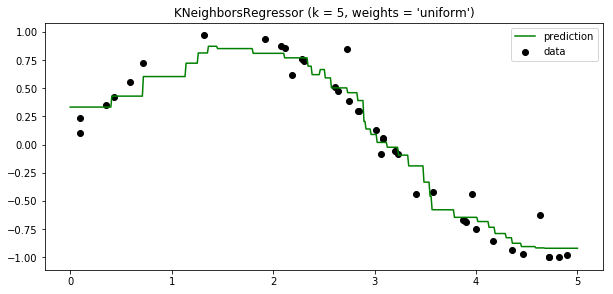

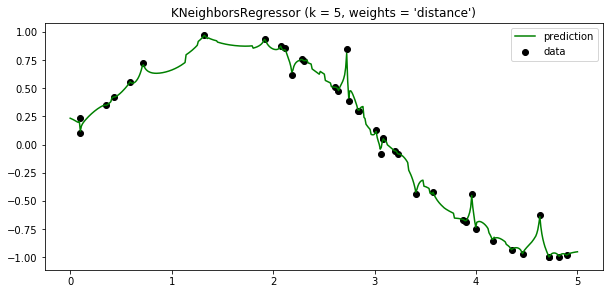

In [16]:
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
# Generando una muestra de datos
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Añadimos ruido al target
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Ajustamos un modelo de regresión 
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    plt.figure(figsize=(10,10))
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

El uso de multi-output neares neigbors para regresión se muestra en el siguiente ejemplo. El valor de los inputs (X) serían los pixeles de la parte superior de la cara, mientras que los outputs (Y) serían los pixeles de la parte inferior de la cara.


Automatically created module for IPython interactive environment


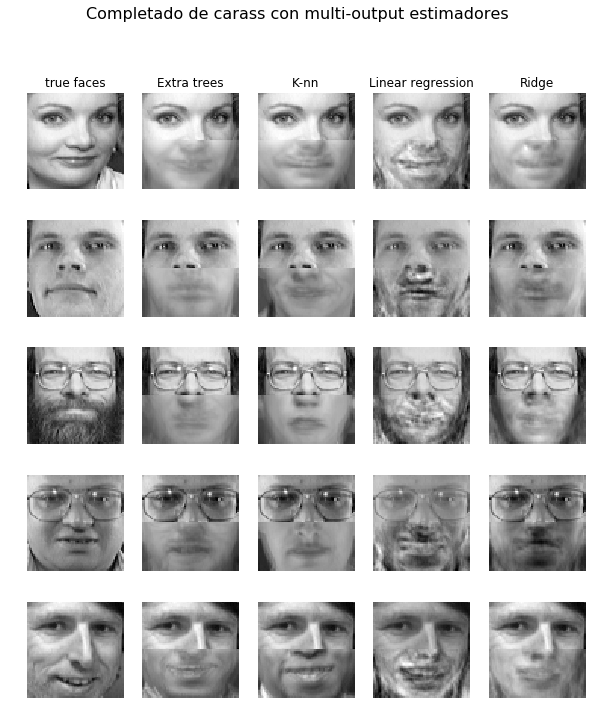

In [17]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Cargando el conjunto de caras
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test sobre n subconjunto de personas
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Ajustando estimadores
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Dibujando las caras completas
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Completado de carass con multi-output estimadores", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()